1.Introduction Section:

	In this section, we would define the scope of this project and the core idea of this project. Primary question for any business owner would be selecting the location for their operations. Here I would consider a restaurant owner who is looking for expanding in the city of Toronto. The investors/owners would need certain proofs to consider a particular neighborhood in Toronto for their new venture which would result in profits. One can understand the neighborhoods by exploring the venues around and can get an idea on the type of locality.

Business problem: 
	Challenge is to find a suitable location in Toronto for a new restaurant along with recommendations regarding the theme and cuisine that would comply with the demands of the restaurant owner.
Target audience:
	Target audience for this project would be
•	Business executives for exploring options in and around a particular location
•	Investors/ potential owners of restaurants, coffee shops, gyms
•	Real estate dealers 
•	Data science enthusiasts 


Target audience for this project would be
•	Business executives for exploring options in and around a particular location
•	Investors/ potential owners of restaurants, coffee shops, gyms
•	Real estate dealers 
•	Data science enthusiasts 


In [19]:
import pandas as pd
import numpy as np
import wikipedia as wd

In [20]:

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)

## Part1: Data Extraction from Wikipedia 

2.Data Section: 
	Data that is required to solve above business problem:
•	List of neighborhoods in Toronto
•	Geospatial data regarding the neighborhoods
•	Venues around neighborhood
Data sources:
•	“List of Postal code of Canada: M” https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M) wiki page to get all the information about the neighborhoods present in Toronto
•	“https://cocl.us/Geospatial_data” csv file and geocoder to get geospatial data of neighborhoods
•	Foursquare API calls for getting information regarding venues in Toronto 


Data cleaning/preprocessing:
1.	Data from wiki regarding the neighborhoods is extracted into data frame which include neighborhood name, postal code and borough.
2.	Only cells with assigned borough are processed ignoring others
3.	Latitude and longitude data is obtained from CSV file and added to the data frame to complete the data frame
4.	Foursquare API call is utilized to obtain venues around each neighborhood and the data is merged into a dataframe along with venue categories 


In [21]:
html = wd.page("List of postal codes of Canada: M").html().encode("UTF-8")
df = pd.read_html(html, header = 0)[0]
df.head()



,Postal code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront


Cells with Borough as "Not assigned" will be removed from the dataset </n>Cells with Neighborhood as NaN would be assigned with the same value as Borough

In [22]:
df = df[df.Borough != 'Not assigned']
for index, row in df.iterrows():
    if row['Neighborhood'] == 'Not assigned':
        row['Neighborhood'] = row['Borough']
df = df.rename(columns={'Postal code': 'Postalcode'})
df.head()

,Postalcode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront
5,M6A,North York,Lawrence Manor / Lawrence Heights
6,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


In [23]:
df = df.apply(lambda x: x.str.replace('/',',')).reset_index()
df.head()

,index,Postalcode,Borough,Neighborhood
0,2,M3A,North York,Parkwoods
1,3,M4A,North York,Victoria Village
2,4,M5A,Downtown Toronto,"Regent Park , Harbourfront"
3,5,M6A,North York,"Lawrence Manor , Lawrence Heights"
4,6,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government"


In [24]:
df 


,index,Postalcode,Borough,Neighborhood
0,2,M3A,North York,Parkwoods
1,3,M4A,North York,Victoria Village
2,4,M5A,Downtown Toronto,"Regent Park , Harbourfront"
3,5,M6A,North York,"Lawrence Manor , Lawrence Heights"
4,6,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government"
5,8,M9A,Etobicoke,Islington Avenue
6,9,M1B,Scarborough,"Malvern , Rouge"
7,11,M3B,North York,Don Mills
8,12,M4B,East York,"Parkview Hill , Woodbine Gardens"
9,13,M5B,Downtown Toronto,"Garden District, Ryerson"


In [25]:
df.shape


(103, 4)

## Part2: Adding Latitude and Longitude details 


In [26]:
# Using csv "http://cocl.us/Geospatial_data" to obtain latitude and longitude details of each location(Postal code)
Geo_data = pd.read_csv("http://cocl.us/Geospatial_data")
Geo_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [27]:
Geo_data= Geo_data.rename(columns={'Postal Code': 'Postalcode'})
toronto_df=pd.merge(df,Geo_data, on='Postalcode')
toronto_df.head()

,index,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,2,M3A,North York,Parkwoods,43.753259,-79.329656
1,3,M4A,North York,Victoria Village,43.725882,-79.315572
2,4,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
3,5,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763
4,6,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494


In [28]:
toronto_df

,index,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,2,M3A,North York,Parkwoods,43.753259,-79.329656
1,3,M4A,North York,Victoria Village,43.725882,-79.315572
2,4,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
3,5,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763
4,6,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494
5,8,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,9,M1B,Scarborough,"Malvern , Rouge",43.806686,-79.194353
7,11,M3B,North York,Don Mills,43.745906,-79.352188
8,12,M4B,East York,"Parkview Hill , Woodbine Gardens",43.706397,-79.309937
9,13,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


## Part3: Exploring neighborhoods in Toronto¶

In [29]:
toronto_df[toronto_df['Postalcode'] == "M9V"]

,index,Postalcode,Borough,Neighborhood,Latitude,Longitude
89,143,M9V,Etobicoke,"South Steeles , Silverstone , Humbergate , Jam...",43.739416,-79.588437


Importing necessary libraries for converting an address into geospatial address


In [15]:
!conda install -c conda-forge geopy 
from geopy.geocoders import Nominatim 
!conda install -c conda-forge folium=0.5.0 
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          92 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0   conda-forge
    geopy:         1.21.0-py_0 conda-forge


geographiclib-1.50   | 34 KB     | ##################################### | 100% 
geopy-1.21.0         | 58 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

## Package Plan ##

  en

In [30]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(toronto_df['Borough'].unique()),
        toronto_df.shape[0]
    )
)


The dataframe has 10 boroughs and 103 neighborhoods.


In [31]:

#Use geopy library to get the latitude and longitude values of toronto City.

address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
lat = location.latitude
lon = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(lat, lon))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


### Map using folium indicating the neighborhoods of toronto

In [34]:

map_toronto = folium.Map(location=[lat, lon], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_df['Latitude'], toronto_df['Longitude'], toronto_df['Borough'], toronto_df['Neighborhood']):
    label = '{},{}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#76EE00',
        fill_opacity=0.6,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [35]:
CLIENT_ID = '4LCNKTZYUM2RG03U0UCYAZUAI2L4CDG12ACMJUWW3WWTXRHJ' # your Foursquare ID
CLIENT_SECRET = 'PYQ4OF40CTOY1JQAAEZGYQXLYFOSQ3QMZKYH10ODZKWFLFWI' # your Foursquare Secret
VERSION = '20200502' # Foursquare API version
radius = 1000
LIMIT = 200

In [41]:
import io
import requests
radius=1000
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lon, VERSION, radius)
results = requests.get(url).json()

In [42]:

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']

    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [43]:
import json
from pandas.io.json import json_normalize

venues = results['response']['groups'][0]['items']

nearby_venues = json_normalize(venues) # flatten JSON

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Toronto Islands,Park,43.622112,-79.378495
1,Porter Lounge,Airport Lounge,43.630680,-79.395756
2,Bestival Toronto,Music Venue,43.623140,-79.391107
3,Pizza Pizza,Pizza Place,43.622237,-79.378935
4,Toronto Island BBQ & Beer,BBQ Joint,43.623440,-79.378381


In [44]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [45]:

toronto_venues = getNearbyVenues(names=toronto_df['Neighborhood'],
                                   latitudes=toronto_df['Latitude'],
                                   longitudes=toronto_df['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park , Harbourfront
Lawrence Manor , Lawrence Heights
Queen's Park , Ontario Provincial Government
Islington Avenue
Malvern , Rouge
Don Mills
Parkview Hill , Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park , Princess Gardens , Martin Grove , Islington , Cloverdale
Rouge Hill , Port Union , Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate , Bloordale Gardens , Old Burnhamthorpe , Markland Wood
Guildwood , Morningside , West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor , Wilson Heights , Downsview North
Thorncliffe Park
Richmond , Adelaide , King
Dufferin , Dovercourt Village
Scarborough Village
Fairview , Henry Farm , Oriole
Northwood Park , York University
East Toronto
Harbourfront East , Union Station , Toronto Islands
Little Portugal , Trinity
Kennedy Park , Ionview , East Birchmount Park
Bayview Village
Do

In [46]:
print(toronto_venues.shape)
toronto_venues.head()

(2151, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


<BarContainer object of 25 artists>

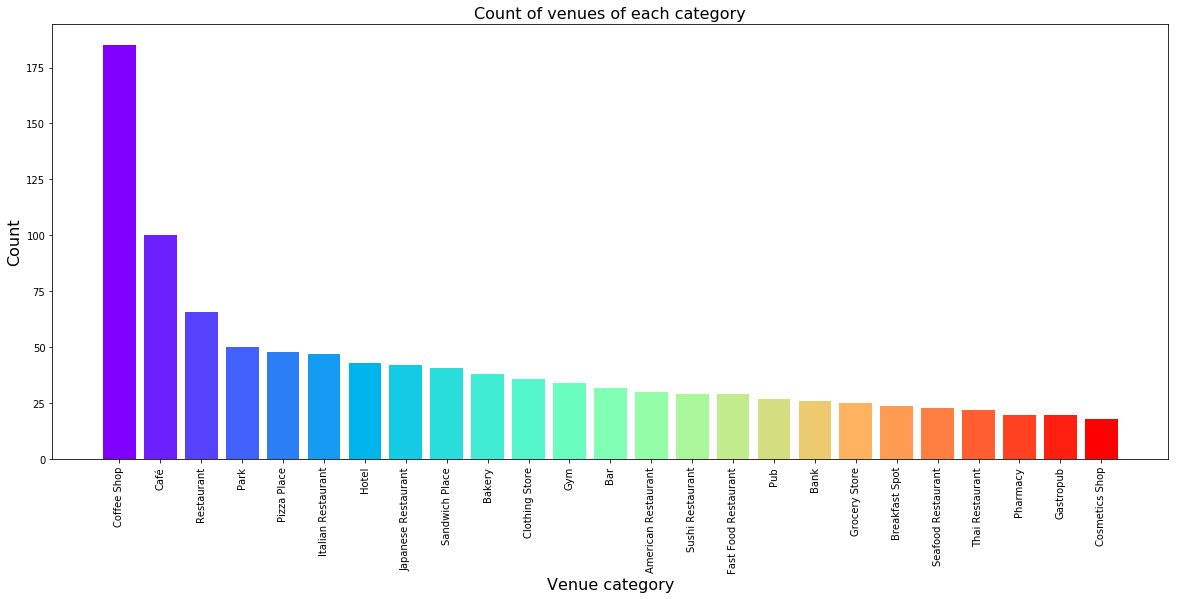

In [144]:
venue_distribution = toronto_venues['Venue Category'].value_counts().sort_values(ascending=False)[:25]
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (20, 8))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

In [47]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,5,5,5,5,5,5
"Alderwood , Long Branch",10,10,10,10,10,10
"Bathurst Manor , Wilson Heights , Downsview North",19,19,19,19,19,19
Bayview Village,4,4,4,4,4,4
"Bedford Park , Lawrence Manor East",24,24,24,24,24,24
Berczy Park,57,57,57,57,57,57
"Birch Cliff , Cliffside West",4,4,4,4,4,4
"Brockton , Parkdale Village , Exhibition Place",23,23,23,23,23,23
Business reply mail Processing CentrE,18,18,18,18,18,18


In [48]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 267 uniques categories.


Obtained unique categories of venues in toronto 

#### Analysing each neighborhood by exploring venue categories around the neighborhood


In [49]:
#Converting the categories into columns(one hot encoding)
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
# Adding neighborhood to the table
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood']

fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
#Grouping neighborhood using frequency of occurance of each category
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Agincourt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0000

In [50]:
toronto_grouped.shape

(93, 267)

In [97]:

toronto_Coffee =toronto_grouped[['Neighborhood','Coffee Shop']].sort_values(by=['Coffee Shop'],ascending=False).iloc[0:11,:]
toronto_Coffee

,Neighborhood,Coffee Shop
90,Woburn,0.500000
50,"Milliken , Agincourt North , Steeles East , L'...",0.333333
26,East Toronto,0.333333
62,"Queen's Park , Ontario Provincial Government",0.263158
21,"Del Ray , Mount Dennis , Keelsdale and Silvert...",0.250000
57,"Northwood Park , York University",0.200000
13,Central Bay Street,0.174603
63,"Regent Park , Harbourfront",0.166667
11,Canada Post Gateway Processing Centre,0.166667
85,Victoria Village,0.166667


Text(0.5, 1.0, 'Neighborhoods with high frequency of coffee shops')

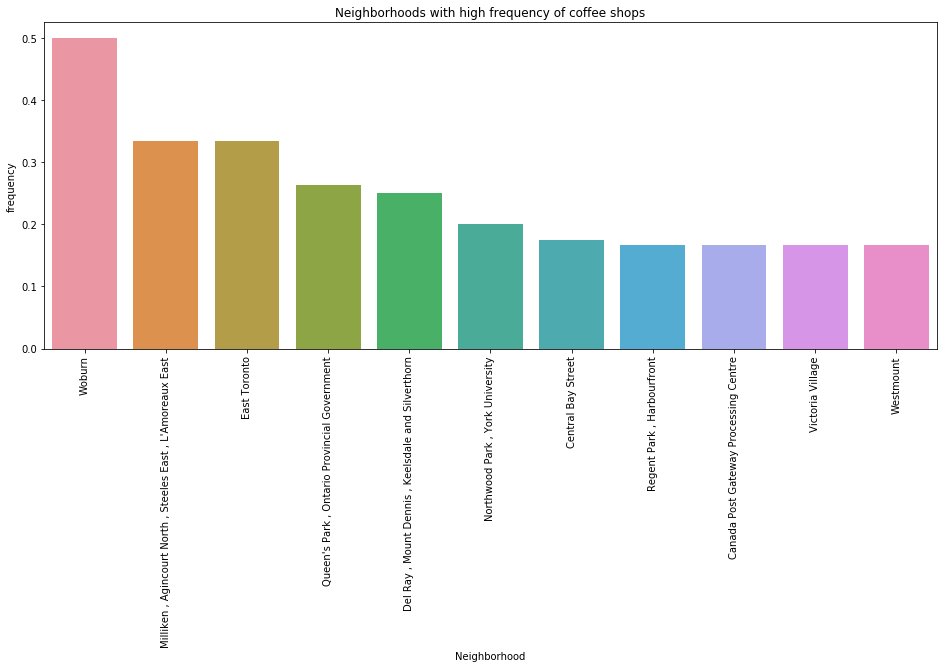

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 6))
ax=sns.barplot(x='Neighborhood',y='Coffee Shop',data=toronto_Coffee)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set(xlabel='Neighborhood', ylabel='frequency')
ax.set_title("Neighborhoods with high frequency of coffee shops")

In [105]:
toronto_fast_food =toronto_grouped[['Neighborhood','Fast Food Restaurant']].sort_values(by=['Fast Food Restaurant'],ascending=False).iloc[0:11,:]
toronto_fast_food

,Neighborhood,Fast Food Restaurant
49,"Malvern , Rouge",0.500000
21,"Del Ray , Mount Dennis , Keelsdale and Silvert...",0.500000
74,"Steeles West , L'Amoreaux West",0.117647
71,"South Steeles , Silverstone , Humbergate , Jam...",0.111111
41,"India Bazaar , The Beaches West",0.100000
60,"Parkview Hill , Woodbine Gardens",0.090909
51,"Mimico NW , The Queensway West , South of Bloo...",0.076923
53,"New Toronto , Mimico South , Humber Bay Shores",0.076923
16,"Clarks Corners , Tam O'Shanter , Sullivan",0.066667
28,"Fairview , Henry Farm , Oriole",0.057143


Text(0.5, 1.0, 'Neighborhoods with high frequency of Fast Food Restaurants')

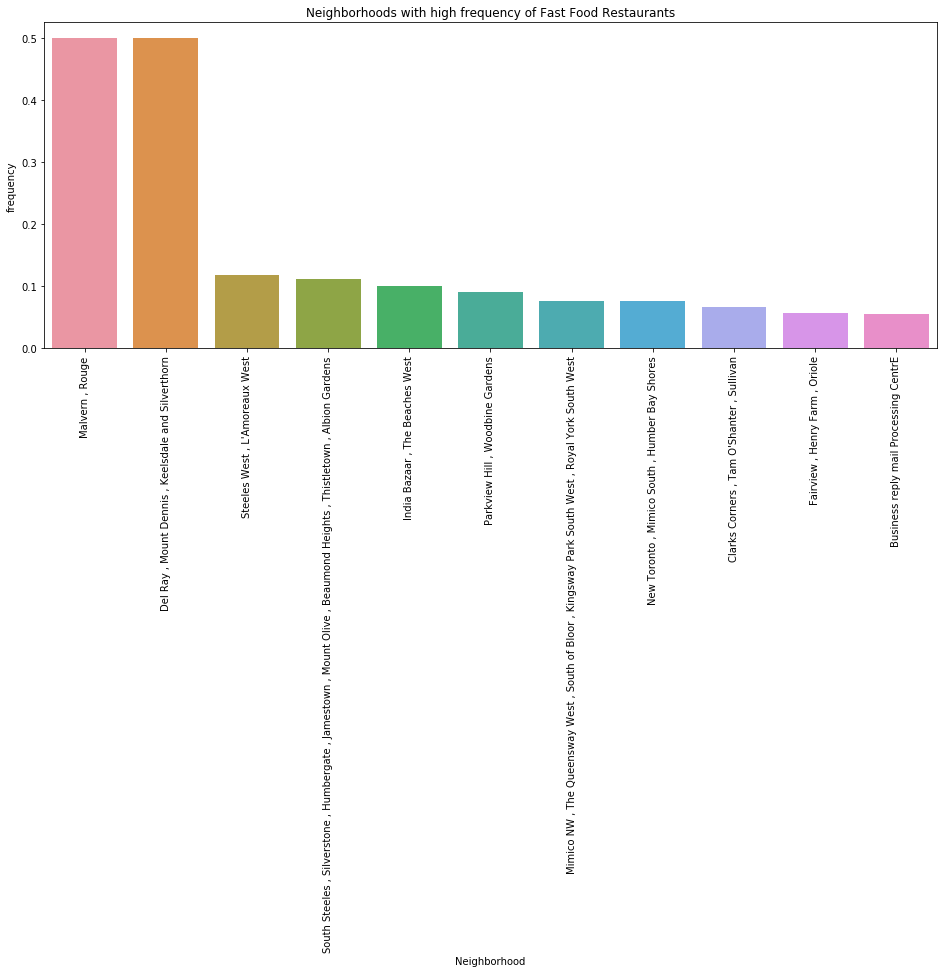

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 6))
ax=sns.barplot(x='Neighborhood',y='Fast Food Restaurant',data=toronto_fast_food)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set(xlabel='Neighborhood', ylabel='frequency')
ax.set_title("Neighborhoods with high frequency of Fast Food Restaurants")

In [107]:
toronto_icecream =toronto_grouped[['Neighborhood','Ice Cream Shop']].sort_values(by=['Ice Cream Shop'],ascending=False).iloc[0:11,:]
toronto_icecream

,Neighborhood,Ice Cream Shop
33,"Golden Mile , Clairlea , Oakridge",0.100000
2,"Bathurst Manor , Wilson Heights , Downsview North",0.052632
41,"India Bazaar , The Beaches West",0.050000
80,"The Danforth West , Riverdale",0.046512
13,Central Bay Street,0.031746
89,Willowdale,0.025641
48,"Little Portugal , Trinity",0.024390
76,Studio District,0.024390
63,"Regent Park , Harbourfront",0.020833
72,St. James Town,0.012987


Text(0.5, 1.0, 'Neighborhoods with high frequency of ice cream shops')

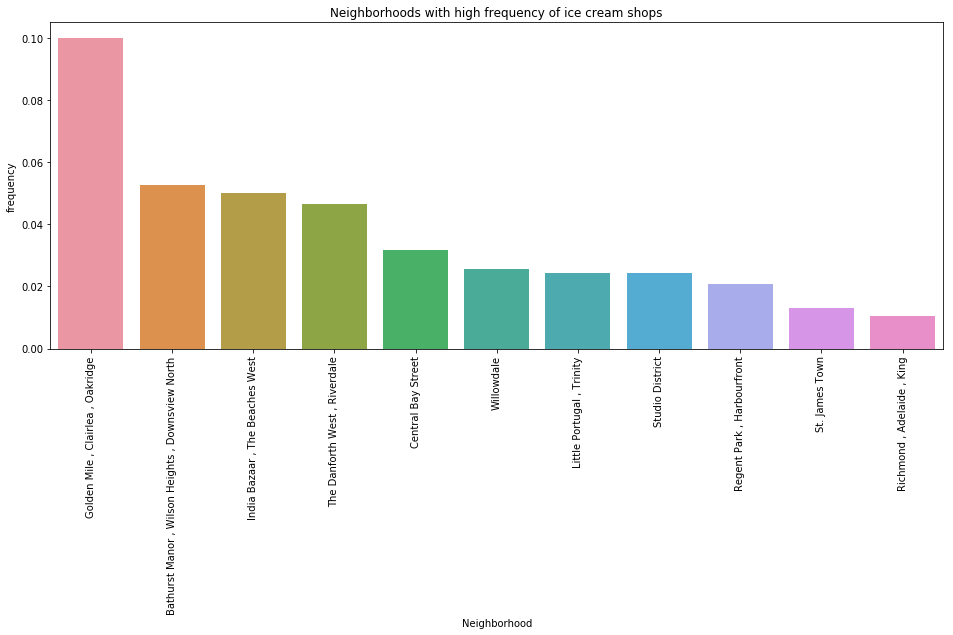

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 6))
ax=sns.barplot(x='Neighborhood',y='Ice Cream Shop',data=toronto_icecream)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set(xlabel='Neighborhood', ylabel='frequency')
ax.set_title("Neighborhoods with high frequency of ice cream shops")

In [111]:
toronto_indian_restaurent =toronto_grouped[['Neighborhood','Indian Restaurant']].sort_values(by=['Indian Restaurant'],ascending=False).iloc[0:11,:]
toronto_indian_restaurent

,Neighborhood,Indian Restaurant
23,"Dorset Park , Wexford Heights , Scarborough To...",0.285714
82,Thorncliffe Park,0.100000
74,"Steeles West , L'Amoreaux West",0.058824
78,"The Annex , North Midtown , Yorkville",0.045455
4,"Bedford Park , Lawrence Manor East",0.041667
19,Davisville,0.027778
80,"The Danforth West , Riverdale",0.023256
73,"St. James Town , Cabbagetown",0.021739
13,Central Bay Street,0.015873
15,Church and Wellesley,0.012821


Text(0.5, 1.0, 'Neighborhoods with high frequency of Indian Restaurants')

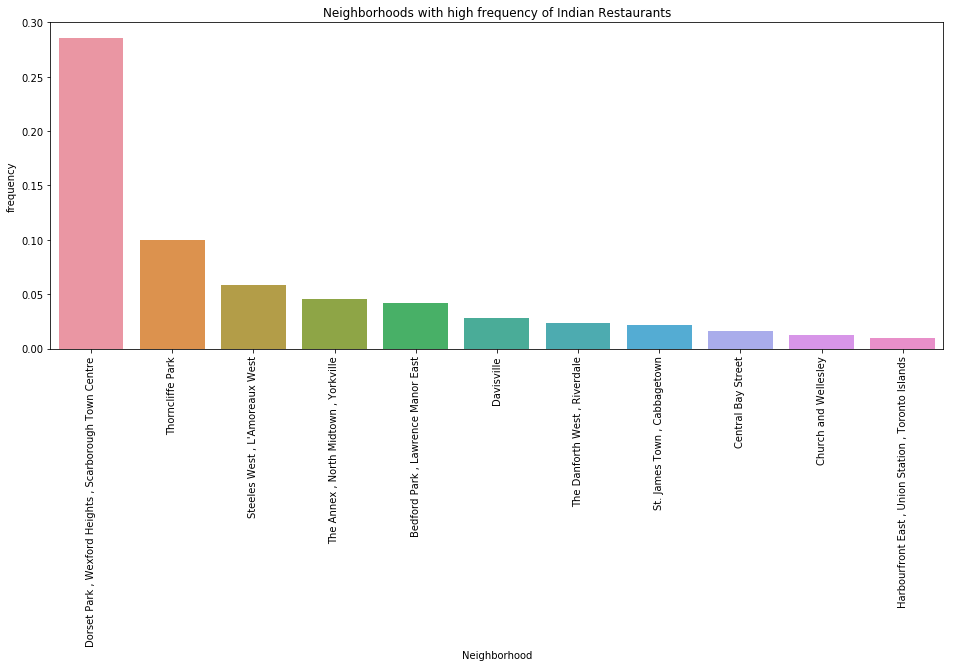

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 6))
ax=sns.barplot(x='Neighborhood',y='Indian Restaurant',data=toronto_indian_restaurent)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set(xlabel='Neighborhood', ylabel='frequency')
ax.set_title("Neighborhoods with high frequency of Indian Restaurants")

In [51]:
#print each neighboorhood with the top 5 most common venues
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0             Clothing Store   0.2
1               Skating Rink   0.2
2                     Lounge   0.2
3             Breakfast Spot   0.2
4  Latin American Restaurant   0.2


----Alderwood , Long Branch----
          venue  freq
0   Pizza Place   0.2
1      Pharmacy   0.1
2  Dance Studio   0.1
3  Skating Rink   0.1
4           Gym   0.1


----Bathurst Manor , Wilson Heights , Downsview North----
           venue  freq
0           Bank  0.11
1    Coffee Shop  0.11
2    Bridal Shop  0.05
3  Deli / Bodega  0.05
4     Restaurant  0.05


----Bayview Village----
                 venue  freq
0                 Café  0.25
1  Japanese Restaurant  0.25
2                 Bank  0.25
3   Chinese Restaurant  0.25
4          Yoga Studio  0.00


----Bedford Park , Lawrence Manor East----
                venue  freq
0         Coffee Shop  0.08
1          Restaurant  0.08
2      Sandwich Place  0.08
3    Sushi Restaurant  0.08
4  Italian Restaurant  

Adding this data into a dataframe and get top 10 common venues for each neighborhood


In [52]:
# function to determine the top 10 common venues based on the frequency of occurance 
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [53]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Lounge,Latin American Restaurant,Clothing Store,Breakfast Spot,Skating Rink,Event Space,Ethiopian Restaurant,Electronics Store,Dim Sum Restaurant,Eastern European Restaurant
1,"Alderwood , Long Branch",Pizza Place,Gym,Pub,Sandwich Place,Dance Studio,Athletics & Sports,Skating Rink,Coffee Shop,Pharmacy,Concert Hall
2,"Bathurst Manor , Wilson Heights , Downsview North",Coffee Shop,Bank,Shopping Mall,Bridal Shop,Ice Cream Shop,Supermarket,Middle Eastern Restaurant,Sushi Restaurant,Fried Chicken Joint,Restaurant
3,Bayview Village,Café,Bank,Chinese Restaurant,Japanese Restaurant,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
4,"Bedford Park , Lawrence Manor East",Coffee Shop,Restaurant,Sandwich Place,Italian Restaurant,Sushi Restaurant,Thai Restaurant,Pharmacy,Pizza Place,Cosmetics Shop,Pub


In [125]:
first_venue=neighborhoods_venues_sorted['1st Most Common Venue'].value_counts().rename_axis('Venue').reset_index(name='counts').iloc[0:10,:]
first_venue

,Venue,counts
0,Coffee Shop,21
1,Park,12
2,Café,6
3,Pizza Place,5
4,Clothing Store,3
5,Sandwich Place,3
6,Gym,3
7,Fast Food Restaurant,3
8,Pharmacy,3
9,Rental Car Location,2


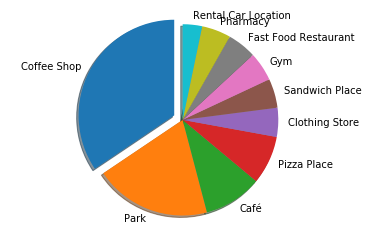

In [129]:
explode=(0.1,0,0,0,0,0,0,0,0,0)
plt.pie(first_venue['counts'], explode=explode, labels=first_venue['Venue'],
 shadow=True, startangle=90)

plt.axis('equal')
plt.show()

In [126]:
second_venue=neighborhoods_venues_sorted['2nd Most Common Venue'].value_counts().rename_axis('Venue').reset_index(name='counts').iloc[0:10,:]
second_venue

,Venue,counts
0,Coffee Shop,9
1,Café,8
2,Women's Store,5
3,Pizza Place,3
4,Trail,3
5,Restaurant,3
6,Park,3
7,Bakery,3
8,Sushi Restaurant,2
9,Bus Line,2


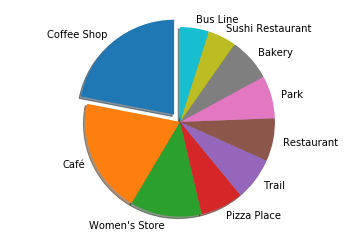

In [130]:
explode=(0.1,0,0,0,0,0,0,0,0,0)
plt.pie(second_venue['counts'], explode=explode, labels=second_venue['Venue'],
 shadow=True, startangle=90)

plt.axis('equal')
plt.show()

In [127]:
third_venue=neighborhoods_venues_sorted['3rd Most Common Venue'].value_counts().rename_axis('Venue').reset_index(name='counts').iloc[0:10,:]
third_venue

,Venue,counts
0,Coffee Shop,7
1,Café,6
2,Pizza Place,3
3,Pub,3
4,Hotel,3
5,Sandwich Place,3
6,Bakery,3
7,Electronics Store,2
8,Italian Restaurant,2
9,Falafel Restaurant,2


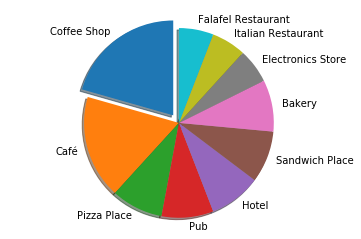

In [132]:
explode=(0.1,0,0,0,0,0,0,0,0,0)
plt.pie(third_venue['counts'], explode=explode, labels=third_venue['Venue'],
 shadow=True, startangle=90)

plt.axis('equal')
plt.show()

In [133]:
fourth_venue=neighborhoods_venues_sorted['4th Most Common Venue'].value_counts().rename_axis('Venue').reset_index(name='counts').iloc[0:10,:]

fourth_venue

,Venue,counts
0,Women's Store,7
1,Sandwich Place,7
2,Japanese Restaurant,4
3,Dim Sum Restaurant,3
4,Breakfast Spot,3
5,Restaurant,3
6,Gastropub,2
7,Donut Shop,2
8,Dessert Shop,2
9,Pub,2


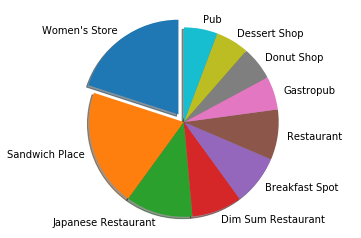

In [134]:
explode=(0.1,0,0,0,0,0,0,0,0,0)
plt.pie(fourth_venue['counts'], explode=explode, labels=fourth_venue['Venue'],
 shadow=True, startangle=90)

plt.axis('equal')
plt.show()

#### Clustering the neighborhoods

In [54]:

from sklearn.cluster import KMeans
# set number of clusters
kclusters = 4

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [55]:

# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged

,index,Postalcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,M3A,North York,Parkwoods,43.753259,-79.329656,1.0,Food & Drink Shop,Park,Women's Store,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
1,3,M4A,North York,Victoria Village,43.725882,-79.315572,0.0,Hockey Arena,Coffee Shop,Intersection,Portuguese Restaurant,French Restaurant,Pizza Place,Eastern European Restaurant,Electronics Store,Drugstore,Donut Shop
2,4,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636,2.0,Coffee Shop,Park,Bakery,Pub,Theater,Breakfast Spot,Café,Shoe Store,Restaurant,Chocolate Shop
3,5,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763,2.0,Clothing Store,Furniture / Home Store,Coffee Shop,Boutique,Shoe Store,Sporting Goods Shop,Miscellaneous Shop,Arts & Crafts Store,Women's Store,Vietnamese Restaurant
4,6,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494,2.0,Coffee Shop,Sushi Restaurant,Diner,Yoga Studio,Burger Joint,Bank,Bar,Beer Bar,Italian Restaurant,Japanese Restaurant
5,8,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,9,M1B,Scarborough,"Malvern , Rouge",43.806686,-79.194353,0.0,Fast Food Restaurant,Print Shop,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant,Deli / Bodega
7,11,M3B,North York,Don Mills,43.745906,-79.352188,2.0,Gym,Restaurant,Beer Store,Japanese Restaurant,Coffee Shop,Asian Restaurant,Concert Hall,Chinese Restaurant,Bike Shop,Italian Restaurant
8,12,M4B,East York,"Parkview Hill , Woodbine Gardens",43.706397,-79.309937,0.0,Pizza Place,Pharmacy,Athletics & Sports,Gastropub,Intersection,Fast Food Restaurant,Pet Store,Breakfast Spot,Bank,Gym / Fitness Center
9,13,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,2.0,Clothing Store,Coffee Shop,Café,Bubble Tea Shop,Italian Restaurant,Japanese Restaurant,Restaurant,Middle Eastern Restaurant,Cosmetics Shop,Theater


In [145]:

import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[lat, lon], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color='green',
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

EXAMINING each cluster 


In [80]:

# Cluster 1
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Postalcode,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,M4A,-79.315572,0.0,Hockey Arena,Coffee Shop,Intersection,Portuguese Restaurant,French Restaurant,Pizza Place,Eastern European Restaurant,Electronics Store,Drugstore,Donut Shop
6,M1B,-79.194353,0.0,Fast Food Restaurant,Print Shop,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant,Deli / Bodega
8,M4B,-79.309937,0.0,Pizza Place,Pharmacy,Athletics & Sports,Gastropub,Intersection,Fast Food Restaurant,Pet Store,Breakfast Spot,Bank,Gym / Fitness Center
50,M9L,-79.565963,0.0,Pizza Place,Department Store,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant
56,M6M,-79.476013,0.0,Fast Food Restaurant,Coffee Shop,Sandwich Place,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
70,M9P,-79.532242,0.0,Pizza Place,Intersection,Coffee Shop,Sandwich Place,Chinese Restaurant,Women's Store,Distribution Center,Dim Sum Restaurant,Diner,Discount Store
77,M9R,-79.554724,0.0,Pizza Place,Bus Line,Mobile Phone Shop,Sandwich Place,Women's Store,Dog Run,Diner,Discount Store,Distribution Center,Doner Restaurant
82,M1T,-79.304302,0.0,Pharmacy,Pizza Place,Shopping Mall,Gas Station,Italian Restaurant,Fried Chicken Joint,Thai Restaurant,Chinese Restaurant,Bank,Intersection
89,M9V,-79.588437,0.0,Grocery Store,Beer Store,Fried Chicken Joint,Fast Food Restaurant,Pizza Place,Coffee Shop,Sandwich Place,Pharmacy,Airport Terminal,Dessert Shop
93,M8W,-79.543484,0.0,Pizza Place,Gym,Pub,Sandwich Place,Dance Studio,Athletics & Sports,Skating Rink,Coffee Shop,Pharmacy,Concert Hall


In [83]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Postalcode,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,-79.329656,1.0,Food & Drink Shop,Park,Women's Store,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
21,M6E,-79.453512,1.0,Park,Women's Store,Spa,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Eastern European Restaurant
64,M9N,-79.518188,1.0,Park,Women's Store,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Drugstore
66,M2P,-79.400049,1.0,Park,Convenience Store,Bank,Bar,Women's Store,Donut Shop,Discount Store,Distribution Center,Dog Run,Doner Restaurant
83,M4T,-79.383160,1.0,Park,Women's Store,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Drugstore
91,M4W,-79.377529,1.0,Park,Trail,Playground,Women's Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run


In [84]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Postalcode,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,M5A,-79.360636,2.0,Coffee Shop,Park,Bakery,Pub,Theater,Breakfast Spot,Café,Shoe Store,Restaurant,Chocolate Shop
3,M6A,-79.464763,2.0,Clothing Store,Furniture / Home Store,Coffee Shop,Boutique,Shoe Store,Sporting Goods Shop,Miscellaneous Shop,Arts & Crafts Store,Women's Store,Vietnamese Restaurant
4,M7A,-79.389494,2.0,Coffee Shop,Sushi Restaurant,Diner,Yoga Studio,Burger Joint,Bank,Bar,Beer Bar,Italian Restaurant,Japanese Restaurant
7,M3B,-79.352188,2.0,Gym,Restaurant,Beer Store,Japanese Restaurant,Coffee Shop,Asian Restaurant,Concert Hall,Chinese Restaurant,Bike Shop,Italian Restaurant
9,M5B,-79.378937,2.0,Clothing Store,Coffee Shop,Café,Bubble Tea Shop,Italian Restaurant,Japanese Restaurant,Restaurant,Middle Eastern Restaurant,Cosmetics Shop,Theater
10,M6B,-79.445073,2.0,Park,Japanese Restaurant,Pub,Metro Station,Pizza Place,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run
12,M1C,-79.160497,2.0,Construction & Landscaping,History Museum,Bar,Women's Store,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
13,M3C,-79.340923,2.0,Gym,Restaurant,Beer Store,Japanese Restaurant,Coffee Shop,Asian Restaurant,Concert Hall,Chinese Restaurant,Bike Shop,Italian Restaurant
14,M4C,-79.318389,2.0,Pharmacy,Video Store,Skating Rink,Athletics & Sports,Dance Studio,Curling Ice,Cosmetics Shop,Beer Store,Park,Diner
15,M5C,-79.375418,2.0,Coffee Shop,Café,American Restaurant,Cocktail Bar,Gastropub,Clothing Store,Italian Restaurant,Gym,Restaurant,Seafood Restaurant


In [85]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Postalcode,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
57,M9M,-79.532242,3.0,Paper / Office Supplies Store,Baseball Field,Women's Store,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Drugstore
101,M8Y,-79.498509,3.0,Baseball Field,Women's Store,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Field
